In [3]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

/Users/bytedance/Desktop/AI_learning/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 1., 0., 0., 0.])

In [15]:
multinomial.Multinomial(10, fair_probs).sample()


tensor([0., 1., 3., 2., 2., 2.])

In [17]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1470, 0.1610, 0.1820, 0.1860, 0.1570, 0.1670])

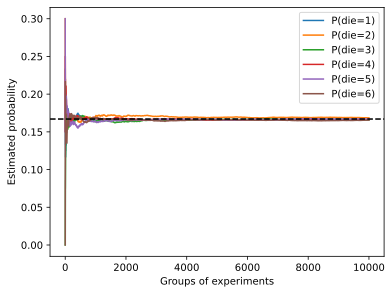

In [19]:
counts = multinomial.Multinomial(10, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();